<a href="https://colab.research.google.com/github/ewondare/book_summaries/blob/main/Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving data_summaries_only.csv to data_summaries_only.csv


In [4]:
import pandas as pd
filename = next(iter(uploaded))
df = pd.read_csv(filename)
df.head(2)

,id,summary
0,620,"Old Major, the old boar on the Manor Farm, ca..."
1,843,"Alex, a teenager living in near-future Englan..."


## Extractive method
Extractive summarization algorithms are employed to generate a summary by selecting and combining key passages from the source material. Unlike humans, these models emphasize creating the most essential sentences from the original text rather than generating new ones.
Extractive summarization utilizes the Text Rank algorithm, which is highly suitable for text summarization tasks.



In [5]:
!pip install spacy

In [6]:
# english language dependancy
!python3 -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
!pip install pytextrank

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.2 MB/s eta 0:00:00


In [8]:
df.rename(columns={'summary' : 'description'} , inplace=True)

In [9]:
import spacy
import pytextrank

/usr/local/lib/python3.10/dist-packages


In [10]:
import spacy

# Load the spaCy model and add the TextRank pipe
nlp = spacy.load("en_core_web_lg")
nlp.add_pipe("textrank")

def summarize_text(txt):
    doc = nlp(txt)

    # Get the summarized sentences using TextRank
    summarized_sentences = [str(sent) for sent in doc._.textrank.summary(limit_phrases=3, limit_sentences=3)]
    summarized_text = ' '.join(summarized_sentences)

    # Tokenize the summarized text and limit to 77 tokens
    summarized_doc = nlp(summarized_text)
    if len(summarized_doc) > 77:
        summarized_text = ' '.join([token.text for token in summarized_doc[:77]])

    return summarized_text


In [ ]:
nlp = spacy.load("en_core_web_lg")
nlp.add_pipe("textrank")

def summarize_text(txt):
    example_text = txt
    doc = nlp(example_text)


    summarized_sentences = [str(sent) for sent in doc._.textrank.summary(limit_phrases=3, limit_sentences=3)]
    summarized_text = ' '.join(summarized_sentences)

    return summarized_text


In [11]:
for index,row in df.iterrows():
  df.at[index , 'extractive_summary'] = summarize_text(row['description'])

Cosine Similarity
You can compute the cosine similarity between the TF-IDF vectors of the 'summary' and 'description' columns to evaluate how similar they are.

In [12]:
import pandas as pd
from google.colab import files
df.to_csv('summary_extractive.csv')
files.download('summary_extractive.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_cosine_similarity(df):
    similarities = []
    vectorizer = TfidfVectorizer()

    for index, row in df.iterrows():
        tfidf_matrix = vectorizer.fit_transform([row['description'], row['extractive_summary']])
        similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
        similarities.append(similarity[0][0])

    return similarities

cosine_scores = evaluate_cosine_similarity(df)
print(cosine_scores)


[0.6931838653411234, 0.5396800065926118, 0.6939273467294255, 0.518804452665523, 0.7600931278399186, 0.5708171112740441, 0.6037969897192945, 0.6320077634642088, 1.0000000000000024, 0.7789661162109764, 0.8528832719803114, 0.8069440145594591, 0.8380724812276258, 0.7450005502539143, 0.641795014960002, 0.724127638926773, 0.6896149992265936, 0.6643301220689253, 0.3869437566585644, 0.9344698681445109, 0.8331773552075836, 0.6228932595628207, 0.6709732720164953, 0.7784690026542306, 0.6296823688372174, 0.6190103170866698, 0.6233325866025279, 0.7076769365463047, 0.7054821405065453, 0.6703014671330678, 0.5265323407829484, 0.6548976786466044, 0.5123304450094479, 0.699512325250673, 0.5045091867400604, 0.5431956998792821, 0.5632737508530148, 0.7102359601855937, 0.7183870803434882, 0.6314858786610256, 0.5386629787606559, 0.39076231125575844, 0.583184497876894, 0.6057110910227599, 0.6631375017370391, 0.46763921555377086, 0.6297359943713637, 0.5805241566798595, 1.0000000000000002, 0.7157207755356362, 0.

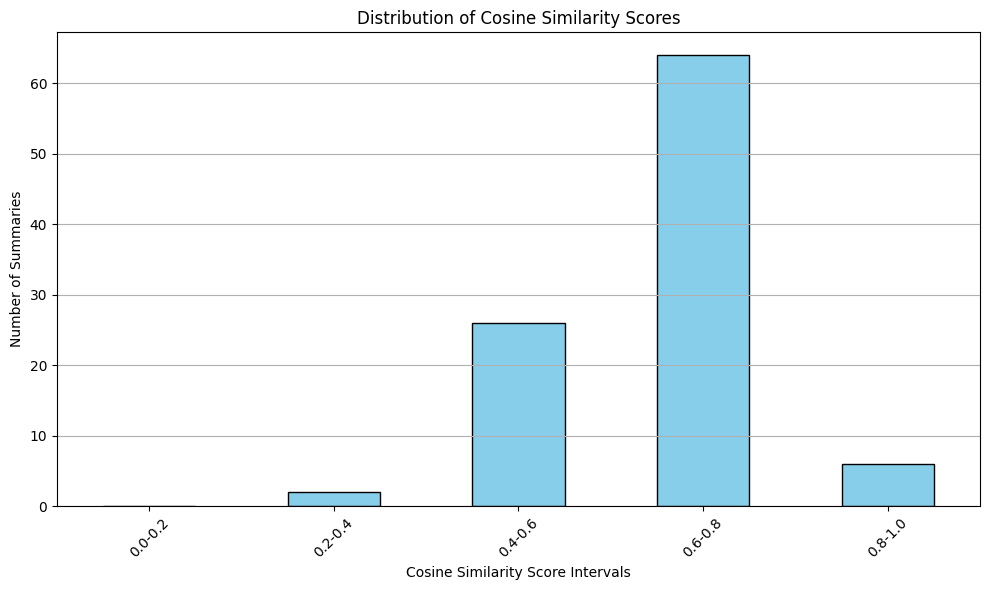

In [15]:
import numpy as np
import matplotlib.pyplot as plt

bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

score_categories = pd.cut(cosine_scores, bins=bins, labels=labels, right=False)
score_counts = score_categories.value_counts().sort_index()

plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity Score Intervals')
plt.ylabel('Number of Summaries')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


(-1.0999992659550313,
 1.0999984786421624,
 -1.0999980633445803,
 1.0999999077783134)

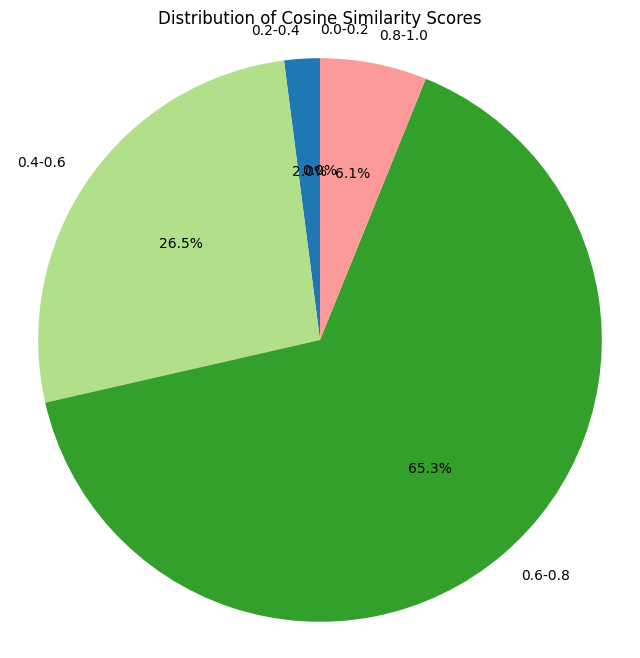

In [16]:
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

score_categories = pd.cut(cosine_scores, bins=bins, labels=labels, right=False)
score_counts = score_categories.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Cosine Similarity Scores')
plt.axis('equal')  #


In [17]:
!pip install rouge


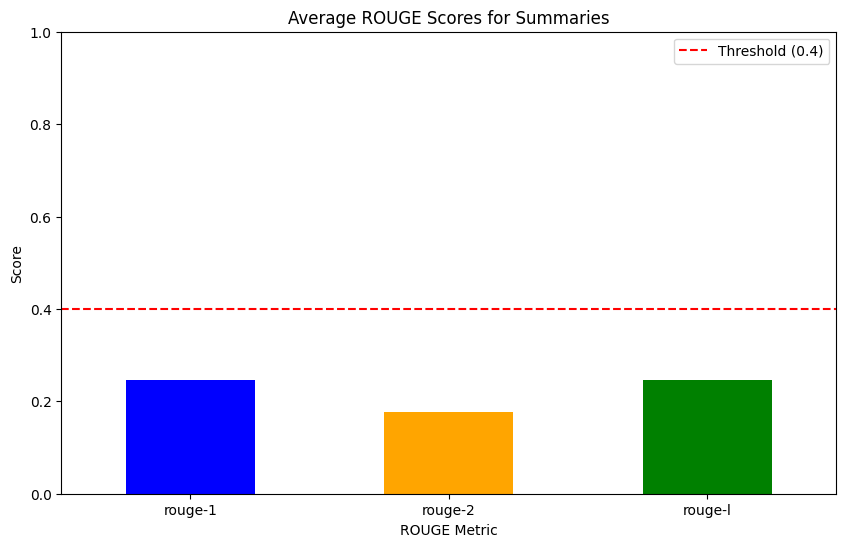

Average ROUGE Scores:
rouge-1    0.247114
rouge-2    0.175868
rouge-l    0.245665
dtype: float64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rouge import Rouge

rouge = Rouge()

def evaluate_summaries(df):
    scores = []
    for index, row in df.iterrows():
        actual = row['description']
        generated = row['extractive_summary']
        score = rouge.get_scores(generated, actual)[0]
        # Extract the ROUGE scores from the dictionary
        scores.append({
            'rouge-1': score['rouge-1']['f'],
            'rouge-2': score['rouge-2']['f'],
            'rouge-l': score['rouge-l']['f']
        })
    return scores

evaluation_scores = evaluate_summaries(df)
scores_df = pd.DataFrame(evaluation_scores)
average_scores = scores_df.mean()

plt.figure(figsize=(10, 6))
average_scores[['rouge-1', 'rouge-2', 'rouge-l']].plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Average ROUGE Scores for Summaries')
plt.ylabel('Score')
plt.xlabel('ROUGE Metric')
plt.ylim(0, 1)  # ROUGE scores are between 0 and 1
plt.axhline(y=0.4, color='r', linestyle='--', label='Threshold (0.4)')
plt.legend()
plt.xticks(rotation=0)
plt.show()

print("Average ROUGE Scores:")
print(average_scores[['rouge-1', 'rouge-2', 'rouge-l']])


## Abstractive method:
Abstractive summarization techniques emulate human writing by generating entirely new sentences to convey key concepts from the source text, rather than merely rephrasing portions of it. These fresh sentences distill the vital information while eliminating irrelevant details, often incorporating novel vocabulary absent in the original text. The term “Transformers” has recently dominated the natural language processing field, although these models initially relied on designs based on recurrent neural networks (RNNs).

In [19]:
pip install pandas transformers torch


In [20]:
import pandas as pd
from transformers import BartForConditionalGeneration, BartTokenizer

model_name = 'facebook/bart-large-cnn'
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)


def summarize_text_a(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=77, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)





/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [21]:
for index,row in df.iterrows():
  df.at[index , 'abstractive_summary'] = summarize_text(row['description'])

In [22]:
df

,id,description,extractive_summary,abstractive_summary
0,620,"Old Major, the old boar on the Manor Farm, ca...","Once Snowball becomes a scapegoat , Napoleon b...","Old Major, the old boar on the Manor Farm, cal..."
1,843,"Alex, a teenager living in near-future Englan...",After Alex 's fellow cellmates blame him for b...,"Alex, a teenager living in near-future England..."
2,986,The text of The Plague is divided into five p...,"When the daily number of deaths jumps to 30, t...",Thousands of rats die in the streets of the to...
3,1756,The argument of the Enquiry proceeds by a ser...,"After expounding his epistemology, Hume explai...",The argument of the Enquiry proceeds by a seri...
4,2080,The novel posits that space around the Milky ...,"The expedition 's facility , called High Lab ,...",The novel posits that space around the Milky W...
...,...,...,...,...
95,31431,Part I opens with Christine reading from Math...,Part I opens with Christine reading from Mat...,The City of Ladies is a book written by Christ...
96,31434,The story deals with the discovery of an arti...,The story deals with the discovery of an art...,The story deals with the discovery of an artif...
97,31435,"In the 22nd century, Dr Vannevar Morgan is a ...","Several space elevators lead to a giant "" circ...","In the 22nd century, Dr Vannevar Morgan is a f..."
98,31584,"In the midst of a wartime evacuation, a Briti...","The survivors elect Ralph as their "" chief "" ,...",A British plane crashes onto an isolated islan...


In [23]:
import pandas as pd
from google.colab import files
df.to_csv('summary.csv')
files.download('summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=07a4e7a1ff47992ce68c79ffa6ead20c546ab9f5d3286f74fa7f9bcf74ae6a0a
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [31]:
import pandas as pd
from rouge_score import rouge_scorer

In [32]:
def calculate_rouge(df):
        scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
        rouge_scores = []

        for index, row in df.iterrows():
            reference = row['description']  # The original text
            summary = row['abstractive_summary']  # The generated summary
            scores = scorer.score(reference, summary)
            rouge_scores.append(scores)

        return rouge_scores

In [33]:
rouge_scores = calculate_rouge(df)

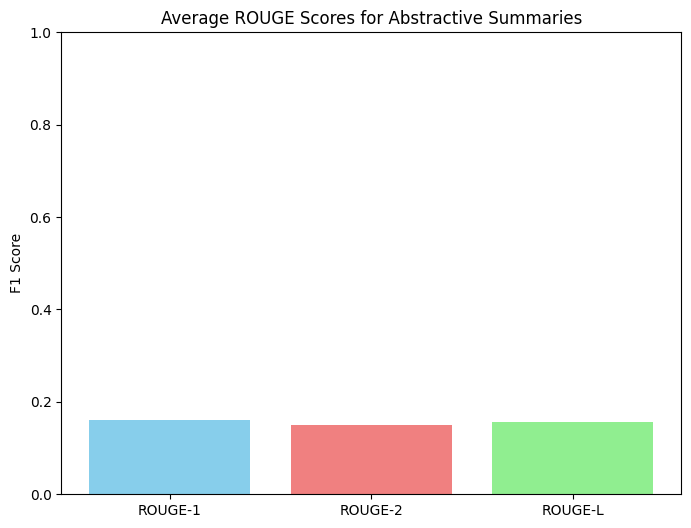

In [34]:
import matplotlib.pyplot as plt
rouge1_scores = [score['rouge1'].fmeasure for score in rouge_scores]
rouge2_scores = [score['rouge2'].fmeasure for score in rouge_scores]
rougeL_scores = [score['rougeL'].fmeasure for score in rouge_scores]

metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
avg_scores = [np.mean(rouge1_scores), np.mean(rouge2_scores), np.mean(rougeL_scores)]

plt.figure(figsize=(8, 6))
plt.bar(metrics, avg_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Average ROUGE Scores for Abstractive Summaries')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Assuming scores are between 0 and 1
plt.show()